

# Libraries



In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# vars.


In [2]:
width = 224
length  =224
batch_size = 64
epoch = 25
fill_mode_names = ['nearest' , 'wrap','reflect' ]

# preprocessing 


In [3]:
train_dir="C:/Users/Ahmed/Downloads/Faces/Train"
generator = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.25,
    zoom_range=0.2,
    fill_mode='nearest',
    rescale=1./255.
 
)
###################################

train_ds = generator.flow_from_directory(train_dir,target_size=(width, length),batch_size=batch_size,
                                        class_mode='categorical',
                                         shuffle=True,
                                        )
classes = list(train_ds.class_indices.keys())

Found 2190 images belonging to 31 classes.


# Visualization 

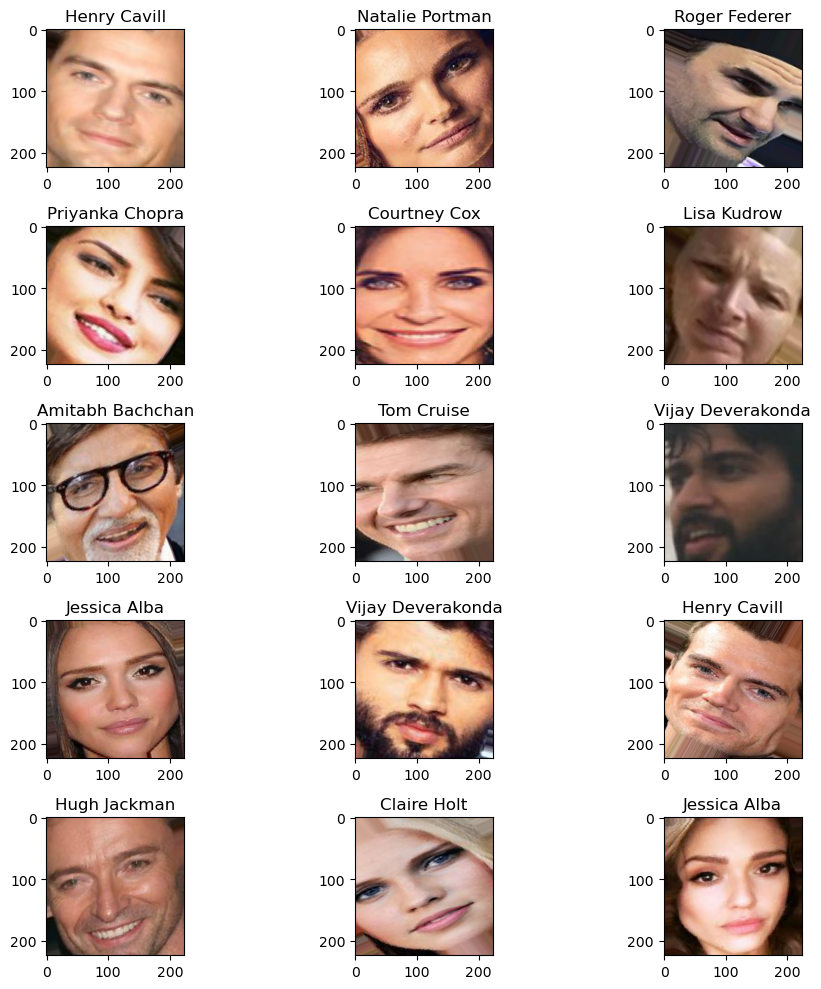

In [15]:
# figure some pics
plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_ds:
        image = X_batch[0]
        plt.title(classes[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# build model


In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

# compile model

In [17]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                      

# Learning rate scheduler

In [18]:
from keras.callbacks import  LearningRateScheduler
# Learning rate scheduler
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.0001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks

In [19]:
callback = [lr_scheduler]

# fitting

In [20]:
history = model.fit(train_ds,epochs=epoch, batch_size=batch_size,shuffle=True,callbacks=callback)

Epoch 1/25
35/35 [==============================] - 65s 2s/step - loss: 3.3282 - accuracy: 0.1260 - lr: 0.0010
Epoch 2/25
35/35 [==============================] - 62s 2s/step - loss: 2.5865 - accuracy: 0.2653 - lr: 0.0010
Epoch 3/25
35/35 [==============================] - 62s 2s/step - loss: 2.2118 - accuracy: 0.3534 - lr: 0.0010
Epoch 4/25
35/35 [==============================] - 62s 2s/step - loss: 1.8678 - accuracy: 0.4356 - lr: 0.0010
Epoch 5/25
35/35 [==============================] - 62s 2s/step - loss: 1.6033 - accuracy: 0.5155 - lr: 0.0010
Epoch 6/25
35/35 [==============================] - 65s 2s/step - loss: 1.3921 - accuracy: 0.5836 - lr: 0.0010
Epoch 7/25
35/35 [==============================] - 56s 2s/step - loss: 1.2401 - accuracy: 0.6178 - lr: 0.0010
Epoch 8/25
35/35 [==============================] - 56s 2s/step - loss: 1.1027 - accuracy: 0.6475 - lr: 0.0010
Epoch 9/25
35/35 [==============================] - 63s 2s/step - loss: 1.0516 - accuracy: 0.6635 - lr: 0.0010
E

# Draw plot ACCURACY AND LOSS

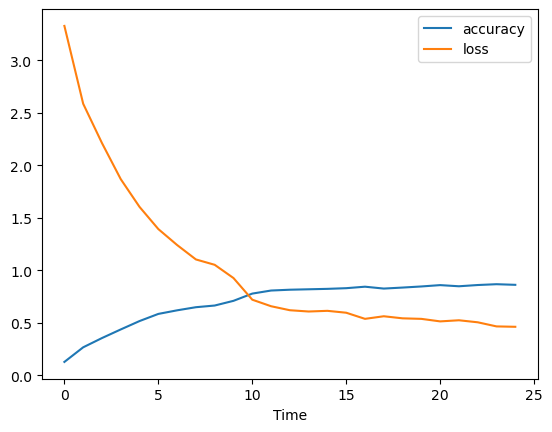

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

# Predict Images

1/1 [==============================] - 0s 214ms/step
Actual:Tom Cruise


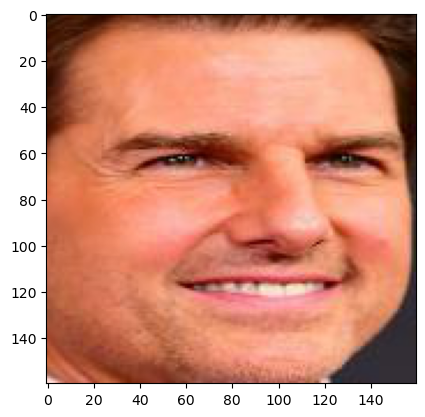

Predicted:  Tom Cruise


In [22]:
from skimage import transform
from PIL import Image as image1
img= "C:/Users/Ahmed/Downloads/Faces/test/Tom Cruise/Tom Cruise_0.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Tom Cruise")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 36ms/step
Actual:Margot Robbie


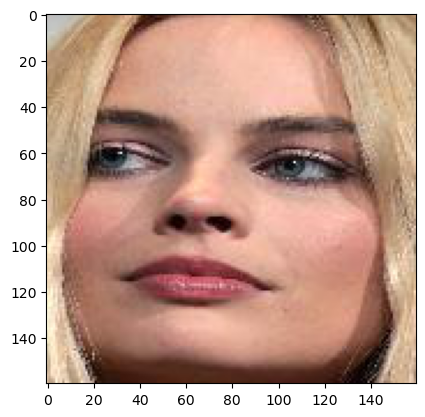

Predicted:  Margot Robbie


In [23]:
img= "C:/Users/Ahmed/Downloads/Faces/test/Margot Robbie/Margot Robbie_1.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Margot Robbie")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 34ms/step
Actual:Hrithik Roshan


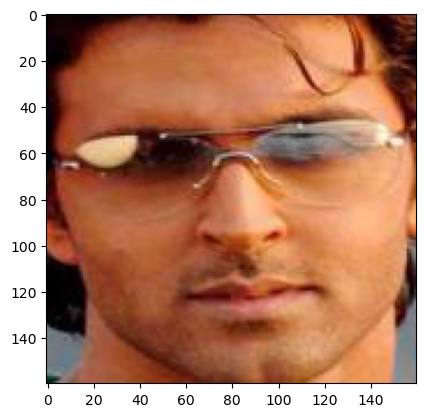

Predicted:  Akshay Kumar


In [24]:
img= "C:/Users/Ahmed/Downloads/Faces/test/Hrithik Roshan/Hrithik Roshan_4.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Hrithik Roshan")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

# Save Model

In [26]:
model.save("CNN_face_Recognize.h5")

# Load Model

In [4]:
from keras.models import load_model
model55 = load_model("CNN_face_Recognize.h5")


# PredIct Image 

1/1 [==============================] - 0s 478ms/step
Actual:Tom Cruise


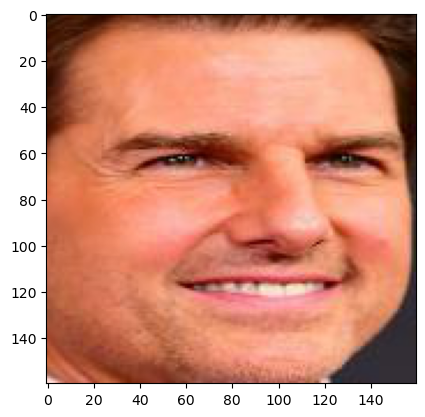

Predicted:  Tom Cruise


In [5]:
from skimage import transform
from PIL import Image as image1
img= "C:/Users/Ahmed/Downloads/Faces/test/Tom Cruise/Tom Cruise_0.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model55.predict(np_img)
print("Actual:Tom Cruise")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 59ms/step
Actual:Brad Pitt


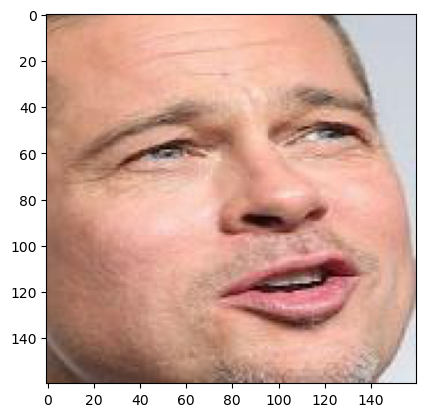

Predicted:  Brad Pitt


In [6]:
img= "C:/Users/Ahmed/Downloads/Faces/test/Brad Pitt/Brad Pitt_6.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model55.predict(np_img)
print("Actual:Brad Pitt")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 54ms/step
Actual:Hrithik Roshan


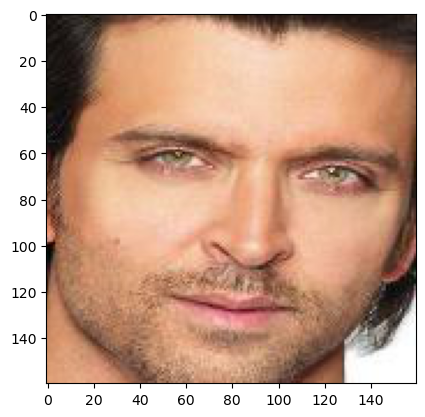

Predicted:  Hrithik Roshan


In [7]:
img= "C:/Users/Ahmed/Downloads/Faces/test/Hrithik Roshan/Hrithik Roshan_10.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model55.predict(np_img)
print("Actual:Hrithik Roshan")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])